In [1]:
import matplotlib.pyplot as plt
import networkx as nx
# import Slimfly as Slimfly
import topologies.DDF as DDF
import math

In [2]:
# list of prime number less than 10: 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97 
# This should be enough for finding all slimfly configurations with less than 20k nodes
prime_numbers=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97 ]
search_min=1  #lower bound of the search
search_max=18000 #upper bound of the search
print(f"Searching for slimfly configurations: (num_vertices, k'), Number of routers between {search_min} and {search_max}")

configs=[]
for delta in [-1, 0, 1]:
    for prime in prime_numbers:
        power = 1
        while(1):
            q=pow(prime,power)
            num_vertices=q**2*2
            if(search_min >= num_vertices):
                power+=1
                continue
            if(num_vertices <= search_max ):
                if ((q-delta)%4==0):
                    kp=int((3*q-delta)/2)
                    print(f"slimfly configuration found: q={q}, delta={delta} ({num_vertices}, {kp})")
                    configs.append((num_vertices, kp))
                power+=1
            else:
                break


Searching for slimfly configurations: (num_vertices, k'), Number of routers between 1 and 18000
slimfly configuration found: q=3, delta=-1 (18, 5)
slimfly configuration found: q=27, delta=-1 (1458, 41)
slimfly configuration found: q=7, delta=-1 (98, 11)
slimfly configuration found: q=11, delta=-1 (242, 17)
slimfly configuration found: q=19, delta=-1 (722, 29)
slimfly configuration found: q=23, delta=-1 (1058, 35)
slimfly configuration found: q=31, delta=-1 (1922, 47)
slimfly configuration found: q=43, delta=-1 (3698, 65)
slimfly configuration found: q=47, delta=-1 (4418, 71)
slimfly configuration found: q=59, delta=-1 (6962, 89)
slimfly configuration found: q=67, delta=-1 (8978, 101)
slimfly configuration found: q=71, delta=-1 (10082, 107)
slimfly configuration found: q=79, delta=-1 (12482, 119)
slimfly configuration found: q=83, delta=-1 (13778, 125)
slimfly configuration found: q=4, delta=0 (32, 6)
slimfly configuration found: q=8, delta=0 (128, 12)
slimfly configuration found: q=16,

In [3]:
#DDF
DDF_configs=[]
search_min=0  #lower bound of the search
search_max=50000 #upper bound of the search
print(f"Searching for Dally Dragonfly configurations: (num_vertices, k'), Number of routers between {search_min} and {search_max}")
a=0
while 1:
    a+=2
    h=a//2
    p=a//2
    k=a+p+h-1
    g=a*h+1
    R=a*g
    if R<search_min:
        continue
    elif R>search_max:
        break
    else:
        print(f"DDF config found: ({R}, {k-h}), (a={a}, h=p={h}, k={k} g={g}, N={R*p})")
        DDF_configs.append((R*p, R, k))



Searching for Dally Dragonfly configurations: (num_vertices, k'), Number of routers between 0 and 50000
DDF config found: (6, 2), (a=2, h=p=1, k=3 g=3, N=6)
DDF config found: (36, 5), (a=4, h=p=2, k=7 g=9, N=72)
DDF config found: (114, 8), (a=6, h=p=3, k=11 g=19, N=342)
DDF config found: (264, 11), (a=8, h=p=4, k=15 g=33, N=1056)
DDF config found: (510, 14), (a=10, h=p=5, k=19 g=51, N=2550)
DDF config found: (876, 17), (a=12, h=p=6, k=23 g=73, N=5256)
DDF config found: (1386, 20), (a=14, h=p=7, k=27 g=99, N=9702)
DDF config found: (2064, 23), (a=16, h=p=8, k=31 g=129, N=16512)
DDF config found: (2934, 26), (a=18, h=p=9, k=35 g=163, N=26406)
DDF config found: (4020, 29), (a=20, h=p=10, k=39 g=201, N=40200)
DDF config found: (5346, 32), (a=22, h=p=11, k=43 g=243, N=58806)
DDF config found: (6936, 35), (a=24, h=p=12, k=47 g=289, N=83232)
DDF config found: (8814, 38), (a=26, h=p=13, k=51 g=339, N=114582)
DDF config found: (11004, 41), (a=28, h=p=14, k=55 g=393, N=154056)
DDF config found: 

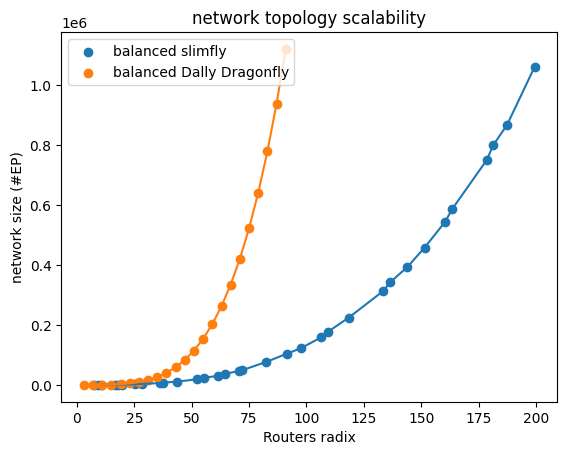

In [4]:
#plot slimfly
configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in configs:
    _x.append(config[1]*3/2)
    _y.append(config[0]*math.ceil(config[1]/2))
plt.scatter(_x, _y, label='balanced slimfly')
plt.plot(_x, _y)

#plot DDF
DDF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in DDF_configs:
    _x.append(config[2])
    _y.append(config[0])
plt.scatter(_x, _y, label='balanced Dally Dragonfly')
plt.plot(_x, _y)

# Add labels and title
plt.xlabel('Routers radix')
plt.ylabel('network size (#EP)')
plt.title('network topology scalability')
plt.legend(loc='upper left')
# plt.yscale("log")
plt.show()

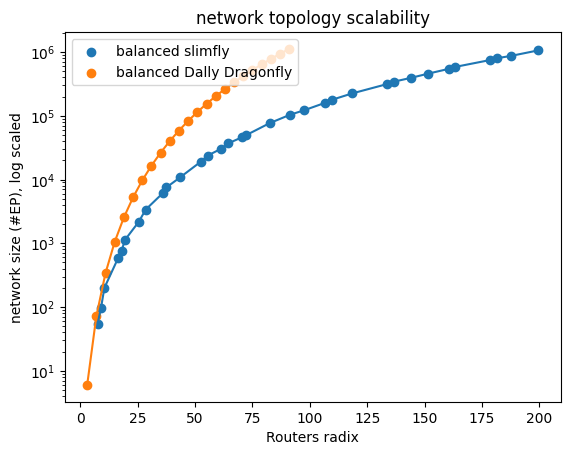

In [5]:
#plot slimfly
configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in configs:
    _x.append(config[1]*3/2)
    _y.append(config[0]*math.ceil(config[1]/2))
plt.scatter(_x, _y, label='balanced slimfly')
plt.plot(_x, _y)

#plot DDF
DDF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in DDF_configs:
    _x.append(config[2])
    _y.append(config[0])
plt.scatter(_x, _y, label='balanced Dally Dragonfly')
plt.plot(_x, _y)

# Add labels and title
plt.xlabel('Routers radix')
plt.ylabel('network size (#EP), log scaled')
plt.title('network topology scalability')
plt.legend(loc='upper left')
plt.yscale("log")
plt.show()

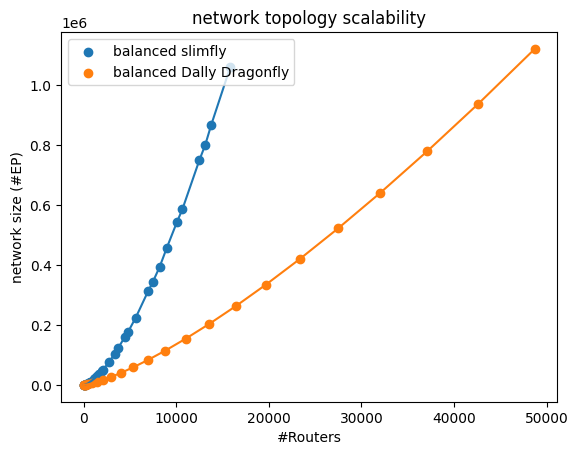

In [6]:
#plot slimfly
configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in configs:
    _x.append(config[0])
    _y.append(config[0]*math.ceil(config[1]/2))
plt.scatter(_x, _y, label='balanced slimfly')
plt.plot(_x, _y)

#plot DDF
DDF_configs.sort()
_x=[] # router radix
_y=[] # network EPs (consider the 'full-bandwidth EP' in slimfly paper)
for config in DDF_configs:
    _x.append(config[1])
    _y.append(config[0])
plt.scatter(_x, _y, label='balanced Dally Dragonfly')
plt.plot(_x, _y)

# Add labels and title
plt.xlabel('#Routers')
plt.ylabel('network size (#EP)')
plt.title('network topology scalability')
plt.legend(loc='upper left')
# plt.yscale("log")
plt.show()

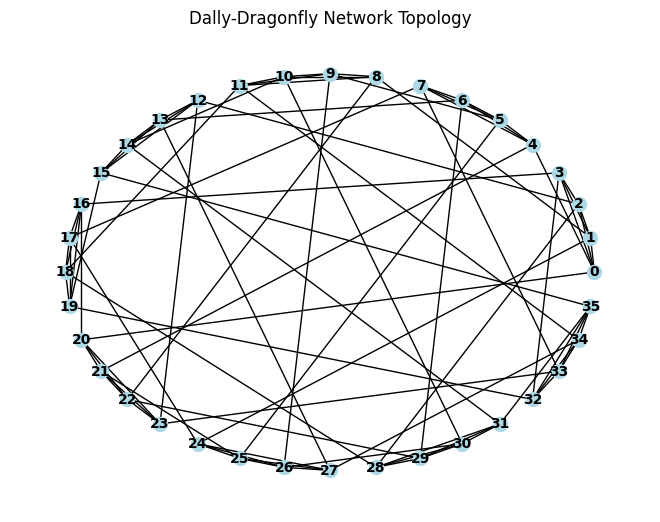

In [7]:
ddf=DDF.DDFtopo(36,5)
G=ddf.nx_graph

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Dally-Dragonfly Network Topology")
plt.show()

In [10]:
paths_dict

{(0, 1): [0, 1],
 (0, 2): [0, 2],
 (0, 3): [0, 3],
 (0, 4): [0, 4],
 (0, 5): [0, 4, 5],
 (0, 6): [0, 4, 6],
 (0, 7): [0, 4, 7],
 (0, 8): [0, 1, 8],
 (0, 9): [0, 1, 8, 9],
 (0, 10): [0, 1, 8, 10],
 (0, 11): [0, 1, 8, 11],
 (0, 12): [0, 2, 12],
 (0, 13): [0, 2, 12, 13],
 (0, 14): [0, 2, 12, 14],
 (0, 15): [0, 2, 12, 15],
 (0, 16): [0, 3, 16],
 (0, 17): [0, 3, 16, 17],
 (0, 18): [0, 3, 16, 18],
 (0, 19): [0, 3, 16, 19],
 (0, 20): [0, 20],
 (0, 21): [0, 20, 21],
 (0, 22): [0, 20, 22],
 (0, 23): [0, 20, 23],
 (0, 24): [0, 1, 24],
 (0, 25): [0, 1, 24, 25],
 (0, 26): [0, 1, 24, 26],
 (0, 27): [0, 1, 24, 27],
 (0, 28): [0, 2, 28],
 (0, 29): [0, 2, 28, 29],
 (0, 30): [0, 2, 28, 30],
 (0, 31): [0, 2, 28, 31],
 (0, 32): [0, 3, 32],
 (0, 33): [0, 3, 32, 33],
 (0, 34): [0, 3, 32, 34],
 (0, 35): [0, 3, 32, 35],
 (1, 0): [1, 0],
 (1, 2): [1, 2],
 (1, 3): [1, 3],
 (1, 4): [1, 0, 4],
 (1, 5): [1, 0, 4, 5],
 (1, 6): [1, 0, 4, 6],
 (1, 7): [1, 0, 4, 7],
 (1, 8): [1, 8],
 (1, 9): [1, 8, 9],
 (1, 10): [1, 

In [9]:
vertices = G.nodes()
vertex_pairs = [(v1, v2) for v1 in vertices for v2 in vertices if v1 != v2]
paths_dict={}
routers_per_group=4

for (v1, v2) in vertex_pairs:
    path=[]
    if G.nodes[v1]["group"]==G.nodes[v2]["group"]: # in the same group
        path=[v1, v2]
        assert(G.has_edge(v1, v2))
    else: # not in the same group
        if G.nodes[v2]["group"] in G.nodes[v1]["adjacency"].keys():
            adjacent_r=G.nodes[v1]["adjacency"][G.nodes[v2]["group"]]
            assert(G.has_edge(v1, adjacent_r))
            if adjacent_r == v2:
                path=[v1, v2]
            else:
                assert(G.nodes[v2]["group"]==G.nodes[adjacent_r]["group"] and G.has_edge(adjacent_r, v2))
                path=[v1, adjacent_r, v2]
        else: #route to the correct router in the same group 
            group_id=G.nodes[v1]["group"]
            routers_in_group = list(range(group_id * routers_per_group, (group_id + 1) * routers_per_group))
            next_router=-1
            for r in routers_in_group:
                if r != v1:
                    if G.nodes[v2]["group"] in G.nodes[r]["adjacency"].keys():
                        next_router=r
                        break
            adjacent_r=G.nodes[next_router]["adjacency"][G.nodes[v2]["group"]]
            if adjacent_r == v2:
                path=[v1, next_router, adjacent_r]
            else:
                assert(G.nodes[v2]["group"]==G.nodes[adjacent_r]["group"] and G.has_edge(adjacent_r, v2))
                path=[v1, next_router, adjacent_r, v2]
    paths_dict[(v1, v2)]=path
